In [1]:
from time import localtime, strftime
print "Last ran on " + strftime("%Y-%m-%d %H:%M:%S", localtime())

Last ran on 2017-03-24 09:06:50


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
def get_FDR_threshold(pos, neg, thr=0.10):
    """
    Gets the score threshold that permits a defined FDR. FDR is calculated as
    ((# decoys > X/# decoys)/(#targets > X / # targets)).
    :param pos: pandas DF column [label] elements where [label] is [positive]
    :param neg: pandas DF column [label] elements where [label] is [negative]
    :param thr: the permitted FDR. default 10%
    :return the score of the positive instance that allows the specified
                            percentage of false discoveries to be scored higher
    """
    # order scores in ascending order
    spos = sorted(pos)
    sneg = sorted(neg)
    # counters
    c_pos = 0
    c_neg = 0
    # total number of each
    len_pos = len(spos)
    len_neg = len(sneg)
    while True:
        if c_pos >= len_pos:
            break
        if c_neg >= len_neg:
            break
        d = (1.0 * len_neg-c_neg)/len_neg
        t = (1.0 * len_pos-c_pos)/len_pos
        # print len_pos, c_pos, t
        fdr = d/t
        # print(fdr, c_pos, c_neg)
        if fdr < thr:
            return spos[c_pos]
        if spos[c_pos] < sneg[c_neg]:
            c_pos += 1
        elif (c_pos + 1 < len_pos and spos[c_pos] == spos[c_pos + 1]):
            c_pos += 1
        else:
            c_neg += 1
    return 999

### PLOTS

On the x-axis: the # of annotations
On the y-axis: the estimated false discovery rate

10 MB datasets:
- MSM
- SVM with EMBL features
- SVM with all features

(0, 1)

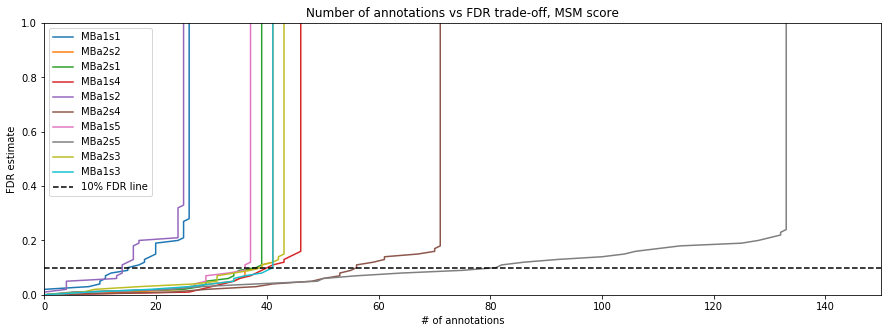

In [45]:
fdr_levels = np.linspace(0, 1, 101)
plt.figure(figsize=(15,5))
    
for ds in os.listdir('../rescore/data/all_ppm25/'):
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    nids = []
    for fdr in fdr_levels:
        score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], fdr)
        nids.append(len(data[(data.target == 1) & (data.msm > score)]))
        # print score, nids[-1]
    
    plt.plot(nids, fdr_levels, label=ds.rstrip('.csv'))
    
plt.plot(np.linspace(0,2500, 2500), [0.1]*2500, label='10% FDR line', color='black', ls='--')
    
plt.xlabel('# of annotations')
plt.ylabel('FDR estimate')
plt.legend(loc='best')
plt.title("Number of annotations vs FDR trade-off, MSM score")
plt.xlim([0,150])
plt.ylim([0,1])

(0, 1)

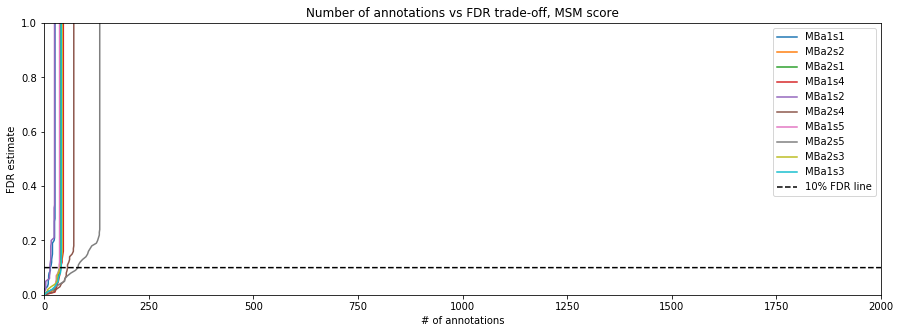

In [44]:
fdr_levels = np.linspace(0, 1, 101)
plt.figure(figsize=(15,5))
    
for ds in os.listdir('../rescore/data/all_ppm25/'):
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    nids = []
    for fdr in fdr_levels:
        score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], fdr)
        nids.append(len(data[(data.target == 1) & (data.msm > score)]))
        # print score, nids[-1]
    
    plt.plot(nids, fdr_levels, label=ds.rstrip('.csv'))
    
plt.plot(np.linspace(0,2500, 2500), [0.1]*2500, label='10% FDR line', color='black', ls='--')
    
plt.xlabel('# of annotations')
plt.ylabel('FDR estimate')
plt.legend(loc='best')
plt.title("Number of annotations vs FDR trade-off, MSM score")
plt.xlim([0,2000])
plt.ylim([0,1])

(0, 1)

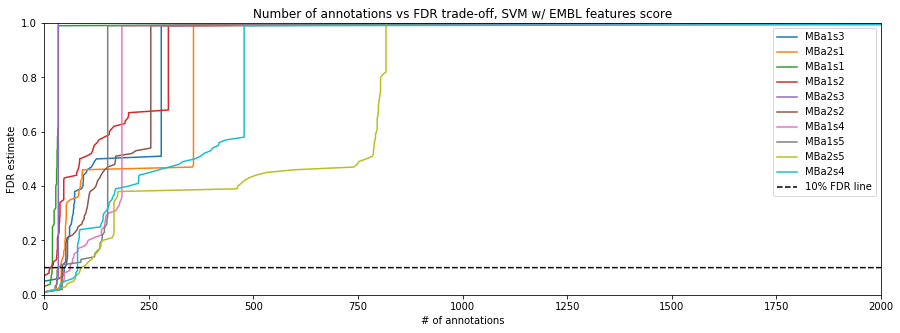

In [42]:
plt.figure(figsize=(15,5))
    
for ds in os.listdir('data/embl_features_test/all_ppm25/'):
    if os.path.isfile('data/embl_features_test/all_ppm25/'+ds+'/data/'+ds+'_rescored.csv'):
        data = pd.read_csv('data/embl_features_test/all_ppm25/'+ds+'/data/'+ds+'_rescored.csv')

        nids = []
        for fdr in fdr_levels:
            score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], fdr)
            nids.append(len(data[(data.target == 1) & (data.final_score > score)]))
            # print score, nids[-1], len(data[data.target==1])
        
        plt.plot(nids, fdr_levels, label=ds)
    else: print ds + ' is missing, check log'
    
plt.plot(np.linspace(0,2500, 2500), [0.1]*2500, label='10% FDR line', color='black', ls='--')

plt.xlabel('# of annotations')
plt.ylabel('FDR estimate')
plt.legend(loc='best')
plt.title("Number of annotations vs FDR trade-off, SVM w/ EMBL features score")
plt.xlim([0,2000])
plt.ylim([0,1])

(0, 1)

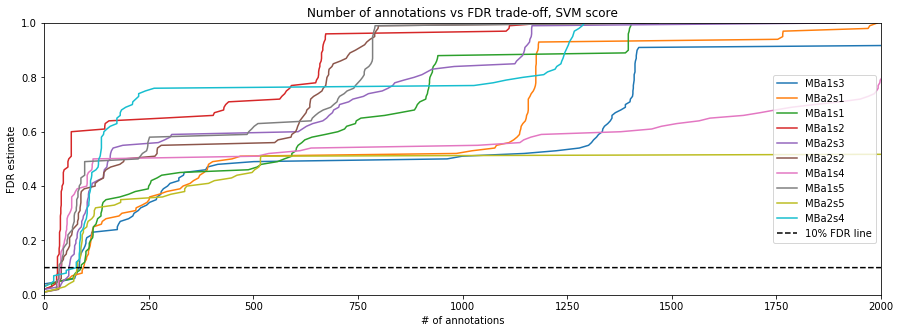

In [83]:
fdr_levels = np.linspace(0, 1, 101)
plt.figure(figsize=(15,5))
    
for ds in os.listdir('../rescore/data/rescored/all_ppm25/'):
    data = pd.read_csv('../rescore/data/rescored/all_ppm25/'+ds+'/data/'+ds+'_rescored.csv')

    nids = []
    for fdr in fdr_levels:
        score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], fdr)
        nids.append(len(data[(data.target == 1) & (data.final_score > score)]))
        # print score, nids[-1], len(data[data.target==1])
        
    plt.plot(nids, fdr_levels, label=ds)
    
plt.plot(np.linspace(0,2500, 2500), [0.1]*2500, label='10% FDR line', color='black', ls='--')

plt.xlabel('# of annotations')
plt.ylabel('FDR estimate')
plt.legend(loc='best')
plt.title("Number of annotations vs FDR trade-off, SVM score")
plt.xlim([0,2000])
plt.ylim([0,1])

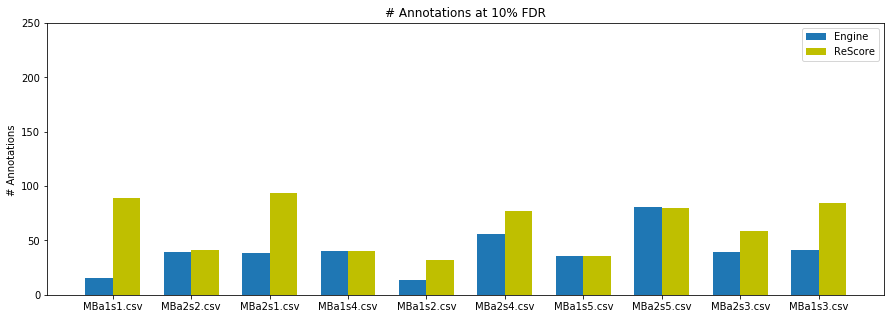

In [88]:
names = []
engine = []
rescored = []
for ds in os.listdir('../rescore/data/all_ppm25/'):
    names.append(ds)
    
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], 0.10)
    engine.append(len(data[(data.target == 1) & (data.msm > score)]))
    
    data = pd.read_csv('../rescore/data/rescored/all_ppm25/'+ds.split('.')[0]+'/data/'+ds.split('.')[0]+'_rescored.csv')
    score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], 0.10)
    rescored.append(len(data[(data.target == 1) & (data.final_score > score)]))
    
fig, ax = plt.subplots(figsize=(15,5))

ind = np.arange(10)
width = 0.35

rects1 = ax.bar(ind, engine, width)
rects2 = ax.bar(ind + width, rescored, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Annotations ')
ax.set_title('# Annotations at 10% FDR')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(names)
ax.set_ylim([0, 250])

ax.legend((rects1[0], rects2[0]), ('Engine', 'ReScore'))

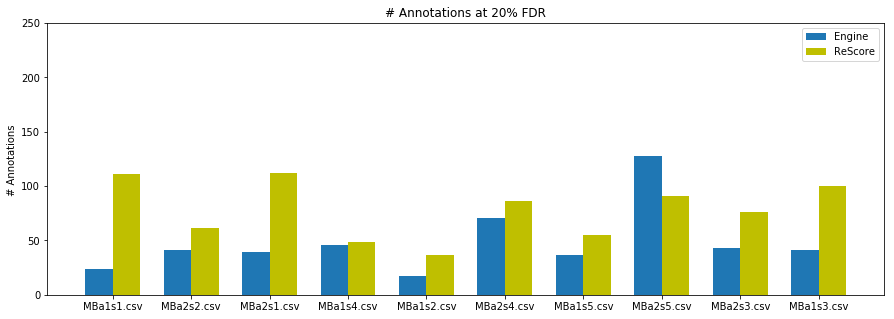

In [89]:
names = []
engine = []
rescored = []
for ds in os.listdir('../rescore/data/all_ppm25/'):
    names.append(ds)
    
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], 0.20)
    engine.append(len(data[(data.target == 1) & (data.msm > score)]))
    
    data = pd.read_csv('../rescore/data/rescored/all_ppm25/'+ds.split('.')[0]+'/data/'+ds.split('.')[0]+'_rescored.csv')
    score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], 0.20)
    rescored.append(len(data[(data.target == 1) & (data.final_score > score)]))
    
fig, ax = plt.subplots(figsize=(15,5))

ind = np.arange(10)
width = 0.35

rects1 = ax.bar(ind, engine, width)
rects2 = ax.bar(ind + width, rescored, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Annotations ')
ax.set_title('# Annotations at 20% FDR')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(names)
ax.set_ylim([0, 250])

ax.legend((rects1[0], rects2[0]), ('Engine', 'ReScore'))

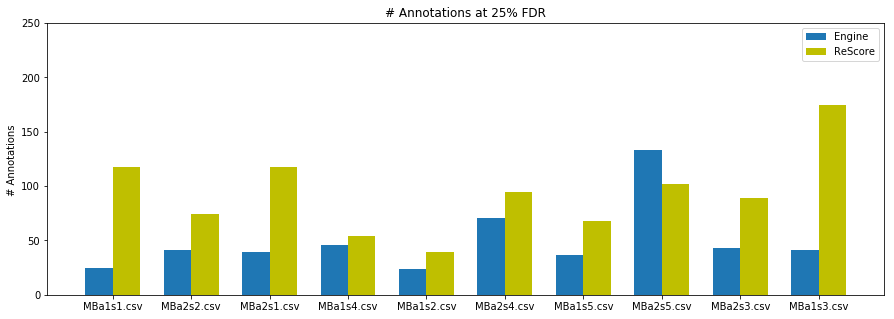

In [90]:
names = []
engine = []
rescored = []
for ds in os.listdir('../rescore/data/all_ppm25/'):
    names.append(ds)
    
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], 0.25)
    engine.append(len(data[(data.target == 1) & (data.msm > score)]))
    
    data = pd.read_csv('../rescore/data/rescored/all_ppm25/'+ds.split('.')[0]+'/data/'+ds.split('.')[0]+'_rescored.csv')
    score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], 0.25)
    rescored.append(len(data[(data.target == 1) & (data.final_score > score)]))
    
fig, ax = plt.subplots(figsize=(15,5))

ind = np.arange(10)
width = 0.35

rects1 = ax.bar(ind, engine, width)
rects2 = ax.bar(ind + width, rescored, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Annotations ')
ax.set_title('# Annotations at 25% FDR')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(names)
ax.set_ylim([0, 250])

ax.legend((rects1[0], rects2[0]), ('Engine', 'ReScore'))

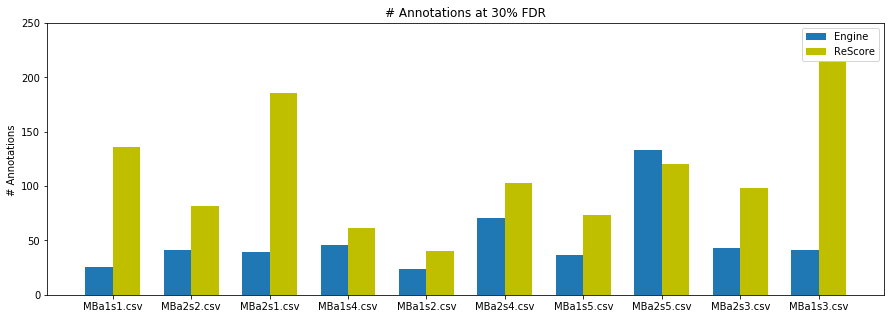

In [91]:
names = []
engine = []
rescored = []
for ds in os.listdir('../rescore/data/all_ppm25/'):
    names.append(ds)
    
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], 0.30)
    engine.append(len(data[(data.target == 1) & (data.msm > score)]))
    
    data = pd.read_csv('../rescore/data/rescored/all_ppm25/'+ds.split('.')[0]+'/data/'+ds.split('.')[0]+'_rescored.csv')
    score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], 0.30)
    rescored.append(len(data[(data.target == 1) & (data.final_score > score)]))
    
fig, ax = plt.subplots(figsize=(15,5))

ind = np.arange(10)
width = 0.35

rects1 = ax.bar(ind, engine, width)
rects2 = ax.bar(ind + width, rescored, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Annotations ')
ax.set_title('# Annotations at 30% FDR')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(names)
ax.set_ylim([0, 250])

ax.legend((rects1[0], rects2[0]), ('Engine', 'ReScore'))

--------------
## TEST ZONE
--------------

(0, 1)

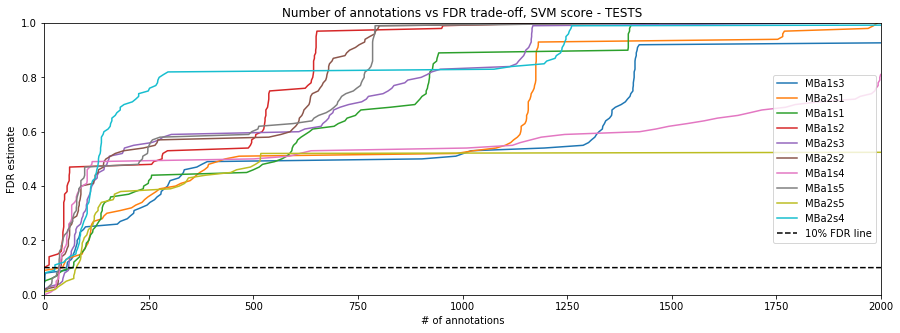

In [92]:
fdr_levels = np.linspace(0, 1, 101)
plt.figure(figsize=(15,5))
    
for ds in os.listdir('data/tests/all_ppm25/'):
    data = pd.read_csv('data/tests/all_ppm25/'+ds+'/data/'+ds+'_rescored.csv')

    nids = []
    for fdr in fdr_levels:
        score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], fdr)
        nids.append(len(data[(data.target == 1) & (data.final_score > score)]))
        # print score, nids[-1], len(data[data.target==1])
        
    plt.plot(nids, fdr_levels, label=ds)
    
plt.plot(np.linspace(0,2500, 2500), [0.1]*2500, label='10% FDR line', color='black', ls='--')

plt.xlabel('# of annotations')
plt.ylabel('FDR estimate')
plt.legend(loc='best')
plt.title("Number of annotations vs FDR trade-off, SVM score - TESTS")
plt.xlim([0,2000])
plt.ylim([0,1])

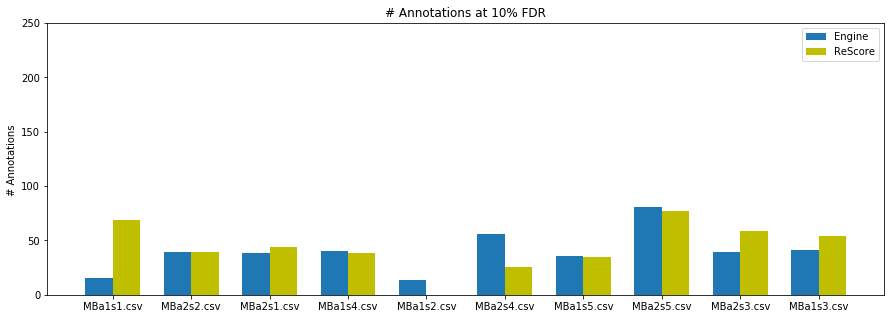

In [93]:
names = []
engine = []
rescored = []
for ds in os.listdir('../rescore/data/all_ppm25/'):
    names.append(ds)
    
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], 0.10)
    engine.append(len(data[(data.target == 1) & (data.msm > score)]))
    
    data = pd.read_csv('data/tests/all_ppm25/'+ds.split('.')[0]+'/data/'+ds.split('.')[0]+'_rescored.csv')
    score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], 0.10)
    rescored.append(len(data[(data.target == 1) & (data.final_score > score)]))
    
fig, ax = plt.subplots(figsize=(15,5))

ind = np.arange(10)
width = 0.35

rects1 = ax.bar(ind, engine, width)
rects2 = ax.bar(ind + width, rescored, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Annotations ')
ax.set_title('# Annotations at 10% FDR')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(names)
ax.set_ylim([0, 250])

ax.legend((rects1[0], rects2[0]), ('Engine', 'ReScore'))

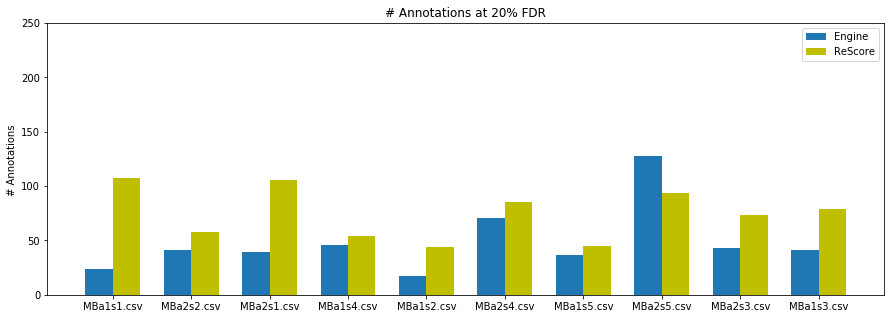

In [94]:
names = []
engine = []
rescored = []
for ds in os.listdir('../rescore/data/all_ppm25/'):
    names.append(ds)
    
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], 0.20)
    engine.append(len(data[(data.target == 1) & (data.msm > score)]))
    
    data = pd.read_csv('data/tests/all_ppm25/'+ds.split('.')[0]+'/data/'+ds.split('.')[0]+'_rescored.csv')
    score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], 0.20)
    rescored.append(len(data[(data.target == 1) & (data.final_score > score)]))
    
fig, ax = plt.subplots(figsize=(15,5))

ind = np.arange(10)
width = 0.35

rects1 = ax.bar(ind, engine, width)
rects2 = ax.bar(ind + width, rescored, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Annotations ')
ax.set_title('# Annotations at 20% FDR')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(names)
ax.set_ylim([0, 250])

ax.legend((rects1[0], rects2[0]), ('Engine', 'ReScore'))

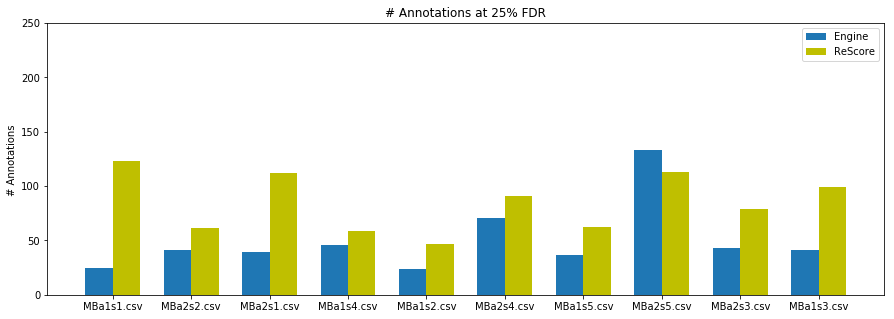

In [95]:
names = []
engine = []
rescored = []
for ds in os.listdir('../rescore/data/all_ppm25/'):
    names.append(ds)
    
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], 0.25)
    engine.append(len(data[(data.target == 1) & (data.msm > score)]))
    
    data = pd.read_csv('data/tests/all_ppm25/'+ds.split('.')[0]+'/data/'+ds.split('.')[0]+'_rescored.csv')
    score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], 0.25)
    rescored.append(len(data[(data.target == 1) & (data.final_score > score)]))
    
fig, ax = plt.subplots(figsize=(15,5))

ind = np.arange(10)
width = 0.35

rects1 = ax.bar(ind, engine, width)
rects2 = ax.bar(ind + width, rescored, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Annotations ')
ax.set_title('# Annotations at 25% FDR')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(names)
ax.set_ylim([0, 250])

ax.legend((rects1[0], rects2[0]), ('Engine', 'ReScore'))

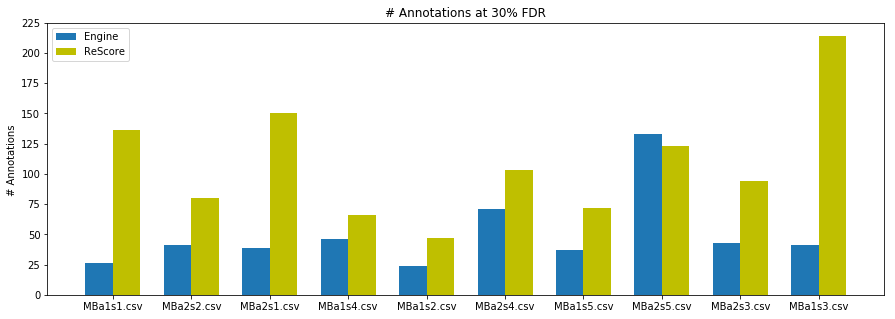

In [97]:
"""  
names = []
engine = []
rescored = []
for ds in os.listdir('../rescore/data/all_ppm25/'):
    names.append(ds)
    
    data = pd.read_csv('../rescore/data/all_ppm25/'+ds, sep='\t')
    # adding boolean "target" column which is 1 if target, 0 if decoy. depends on adduct.
    data['target'] = [1 if data.adduct[r] in ['+Na', '+K', '+H'] else 0 for r in range(len(data))]
    # adding column with msm score: moc * spatial * spectral
    data['msm'] = (data['chaos'] * data['spatial'] * data['spectral'])

    score = get_FDR_threshold(data[data.target==1]['msm'], data[data.target==0]['msm'], 0.30)
    engine.append(len(data[(data.target == 1) & (data.msm > score)]))
    
    data = pd.read_csv('data/tests/all_ppm25/'+ds.split('.')[0]+'/data/'+ds.split('.')[0]+'_rescored.csv')
    score = get_FDR_threshold(data[data.target==1]['final_score'], data[data.target==0]['final_score'], 0.30)
    rescored.append(len(data[(data.target == 1) & (data.final_score > score)]))
  """
fig, ax = plt.subplots(figsize=(15,5))

ind = np.arange(10)
width = 0.35

rects1 = ax.bar(ind, engine, width)
rects2 = ax.bar(ind + width, rescored, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Annotations ')
ax.set_title('# Annotations at 30% FDR')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(names)
# ax.set_ylim([0, 250])

ax.legend((rects1[0], rects2[0]), ('Engine', 'ReScore'))